In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

RSEED=42

In [2]:
# read the credit card data into pandas dataframe

c_card_df = pd.read_csv('../data/creditcard.csv')

# check the first 5 rows of the credit card dataset
c_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check the last 5 rows of the credit card dataset

c_card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# check the shape of the dataframe

c_card_df.shape

(284807, 31)

In [5]:
# check for the general overview of the dataset

c_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data cleaning

Check for missing values and duplicates

In [6]:
# missing values

missing = c_card_df.isnull().sum()

missing

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# total missing values, if any

missing.sum()

0

In [8]:
# duplicates

c_card_df.duplicated().sum()


1081

In [9]:
# remove the duplicates and recheck

c_card_df.drop_duplicates(inplace=True)


In [10]:
c_card_df.duplicated().sum()

0

In [11]:
c_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [12]:
# check class distribution
#label '0' = non_fraudulent transactions
#label '1' = fraudulent transactions

c_card_df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

High clas imbalance detected

Check the time span of the transactions, but first convert time from seconds to hours

In [13]:
c_card_df['Time_hours'] = c_card_df['Time'] / 3600

In [14]:
c_card_df['Time_hours'].min()

0.0

In [15]:
c_card_df['Time_hours'].max()

47.99777777777778

In [16]:
# The above could also be achieved without converting the time to hours

c_card_df['Time'].max() / 3600

47.99777777777778

In [17]:
c_card_df['Time'].min() / 3600

0.0

The data was collected over a period of 48 hours approximately

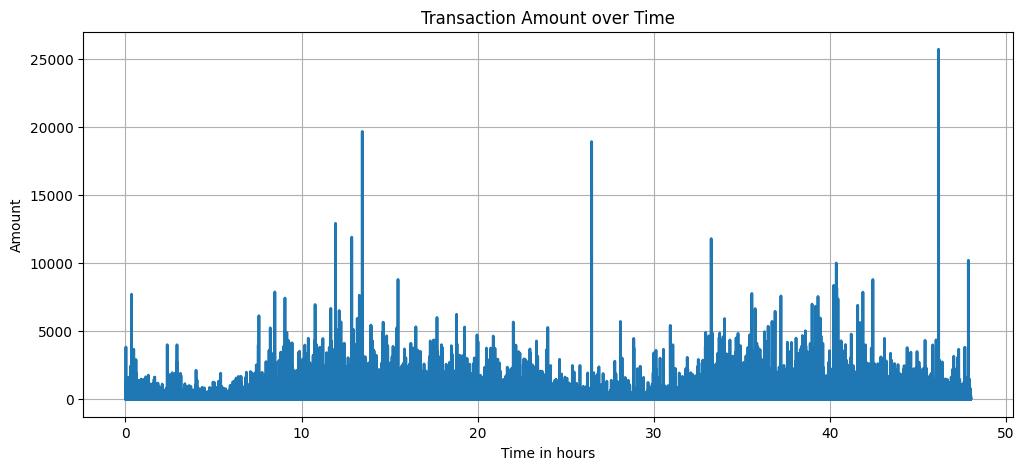

In [18]:
# plot of transaction amount over time

plt.figure(figsize=(12, 5))
plt.plot(c_card_df['Time_hours'], c_card_df['Amount'], linewidth=2)
plt.title('Transaction Amount over Time')
plt.xlabel('Time in hours')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

The high class imbalance can lead to overfitting, therefore to tackle this, Synthetic Minority Over-sampling Technique is employed for oversampling of the minority class while RandomUndersampler is employed for undersampling the majority class.

The combination of SMOTE oversampling and random undersampling sequentially aims to balance the class distribution more effectively and mitigate the effects of class imbalance in the dataset

In [19]:
# defining the features and target variables

X = c_card_df.drop(columns='Class', axis=1)
y = c_card_df['Class']

In [20]:
X.shape

(283726, 31)

In [21]:
y.shape

(283726,)

In [22]:

# Define the pipeline with SMOTE followed by random undersampling
pipeline = Pipeline(steps=[
    ('smote', SMOTE(sampling_strategy = 0.5, random_state = RSEED)),
    ('undersample', RandomUnderSampler(sampling_strategy = 0.8, random_state = RSEED))
])


In [23]:
X, y = pipeline.fit_resample(X, y)

In [24]:
y.value_counts()

Class
0    177032
1    141626
Name: count, dtype: int64

In [25]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=RSEED)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(318658, 31) (238993, 31) (79665, 31)


## Using Random Forest Classifier with GridSearchCV

In [27]:
# instatiate random forest classifier
rf = RandomForestClassifier(random_state=RSEED)

In [32]:
# Defining the grid of hyperparameters for Random Forest Classifier

param_grid_rf = {
    'n_estimators': [100, 250],
    'random_state': [RSEED],
    'max_features': ['sqrt', 0.5],
    'max_depth': [5, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3],
    'verbose': [1]
}

In [33]:
model_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='average_precision', n_jobs=-1)

In [34]:
# training the model
%%time
model_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   17.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   17.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   17.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.1s
[Parallel(n_jobs=1)]: Do

CPU times: user 3min 51s, sys: 2.55 s, total: 3min 54s
Wall time: 56min 2s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 15], 'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 250], 'random_state': [42],
                         'verbose': [1]},
             scoring='average_precision')

In [35]:
# testing the model on unseen data
y_pred = model_rf.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s


In [36]:
# evaluating the model

roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score:', roc_auc)

auprc = average_precision_score(y_test, y_pred)
print('AUPRC Score:', auprc)

f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

ROC AUC Score: 0.9989606542425677
AUPRC Score: 0.9985786734224988
F1 Score: 0.9989119837221461


In [37]:
# testing the model on seen data to be able to ascertain generalisation 
y_train_pred = model_rf.predict(X_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.4s


In [38]:
# model evaluation

roc_auc = roc_auc_score(y_train, y_train_pred)
print("ROC AUC Score_train:", roc_auc)

auprc = average_precision_score(y_train, y_train_pred)
print("AUPRC Score_train:", auprc)

f1 = f1_score(y_train, y_train_pred)
print("F1 Score_train:", f1)

ROC AUC Score_train: 0.9991018558909379
AUPRC Score_train: 0.9987877685914106
F1 Score_train: 0.9990627399079696


## Using KNN with GridSearchCV

In [39]:
# instatiating knn

knn = KNeighborsClassifier()

In [49]:
# Defining the grid of hyperparameters for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': range(1, 5), 
    'leaf_size': range(1, 5), 
    'metric': ['euclidean']
}

In [50]:
model_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='average_precision', n_jobs=-1)

In [51]:
# training knn model

%%time
model_knn.fit(X_train, y_train)

CPU times: user 668 ms, sys: 358 ms, total: 1.03 s
Wall time: 7min 34s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(1, 5), 'metric': ['euclidean'],
                         'n_neighbors': range(1, 5)},
             scoring='average_precision')

In [53]:
# testing the model on seen data to be able to ascertain generalisation 
y_train_knn_pred = model_knn.predict(X_train)

In [54]:
# model evaluation

roc_auc_knn = roc_auc_score(y_train, y_train_knn_pred)
print("ROC AUC Score_train_knn:", roc_auc_knn)

auprc_knn = average_precision_score(y_train, y_train_knn_pred)
print("AUPRC Score_train_knn:", auprc_knn)

f1 = f1_score(y_train, y_train_knn_pred)
print("F1 Score_train_knn:", f1)

ROC AUC Score_train_knn: 0.9712791688827417
AUPRC Score_train_knn: 0.954581882625257
F1 Score_train_knn: 0.968548039638087


In [55]:
# testing the model on unseen data

y_pred_knn = model_knn.predict(X_test)

In [56]:
# model evaluation

roc_auc_test_knn = roc_auc_score(y_test, y_pred_knn)
print("ROC AUC Score_knn:", roc_auc_test_knn)

auprc_test_knn = average_precision_score(y_test, y_pred_knn)
print("AUPRC Score_test_knn:", auprc_test_knn)

f1 = f1_score(y_test, y_pred_knn)
print("F1 Score_test_knn:", f1)

ROC AUC Score_knn: 0.9477275006580133
AUPRC Score_test_knn: 0.9159474307334635
F1 Score_test_knn: 0.9422309342196844


In [58]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define table headers
table.field_names = ["s/n", "ML Algorithm", "ROC AUC(%)", "AUPRC(%)", "f1 score(%)"]

# Add data to the table
table.add_row(["1", "Random Forest Classifier with GridSearcgCV", 99.8, 99.8, 99.8])
table.add_row(["2", "K-Nearest Neighbors Classifier with GridSearchCV", 94.7, 91.5, 94.2])

print('SUMMARY')

# Print the table
print(table)


SUMMARY
+-----+--------------------------------------------------+------------+----------+-------------+
| s/n |                   ML Algorithm                   | ROC AUC(%) | AUPRC(%) | f1 score(%) |
+-----+--------------------------------------------------+------------+----------+-------------+
|  1  |    Random Forest Classifier with GridSearcgCV    |    99.8    |   99.8   |     99.8    |
|  2  | K-Nearest Neighbors Classifier with GridSearchCV |    94.7    |   91.5   |     94.2    |
+-----+--------------------------------------------------+------------+----------+-------------+
